# Linear Statistics Lab
## Author : Vincent HERFELD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from scipy.stats import norm as normalDist


np.random.seed(0) # setting random seed to the value : 0

Let us extract the data from the .csv file "meatspec.csv" and place it in an array of rows.

In [2]:
with open("meatspec.csv") as csvfile:
    reader = csv.reader(csvfile)
    rows = []
    for row in reader:
        rows.append(row)

print(rows[0]) # print the column titles

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'fat']


These are the different column titles, containing the covariates and the target $y =$ "fat".\
Let us now in a dictionnary store the mesurements then calculate the mean and the standard deviation of each covariate and store them in seperate dictionnaries. \
These are calculated using the $n$ iid mesurements and using empirical formulae: 

$ E(V_i) = \displaystyle\frac{1}{n} \displaystyle\sum_{k = 1}^{n} X_i^{(k)}$. \
$ \sigma(V_i) = \sqrt{\displaystyle\frac{1}{n} \displaystyle\sum_{k = 1}^{n}\left( X_i^{(k)} - E(V_i)\right) ^2}$ \
$X_i$ is the array of length $n$ of mesurements corresponding to the covariate $V_i$.

In [3]:
X = []
y = []
p = len(rows[0]) - 1 # number of covariates going from V1 to V100
n = len(rows) - 1    # number of iid mesurments, here n = 215

#we will create a dictionnary containing an array of mesurements for each covariate

for i in range(p):  
    X.append([])  #here each row of X will contain the n mesurements
    
for row in rows[1:]:
    for i in range(p):
        X[i].append(float(row[i])) 
    y.append(float(row[p])) #y is a 1D array of shape (n, 1) containing the target data included in fat

X = np.array(X).T #X must be of shape (n,p) so we format it to a numpy array and transpose it 
y = np.array(y).reshape(-1,1)
print(np.shape(y))
##############################

means = dict()
for i in range(p):  
    means["V" + str(i+1)] = np.sum(X[i]) / n
    
##############################    

std_devs = dict()
for i in range(p):  
    std_devs["V" + str(i+1)] = (np.sum((X[i] - means["V" + str(i+1)])**2) / n)**0.5

(215, 1)


In [4]:
print(X[0][:10])

[2.61776 2.61814 2.61859 2.61912 2.61981 2.62071 2.62186 2.62334 2.62511
 2.62722]


We can see that the data is not contained in $\left[0,1\right]$ it is not normalized.

In [5]:
for i in range(10):
    print(std_devs["V" + str(i + 1)], end=" ")

1.0995627621032513 1.1931916517727137 1.0382239016345074 1.139993912273286 1.2047604403393029 1.280678259411557 1.2679207430943535 1.0639540094046271 1.3992961928354304 1.4573493282370555 

Standardized data has its covariates standard deviations equal to $1$ it is not the case here. We will have to standardize the data later on.

In [6]:
for i in range(10):
    print(means["V" + str(i + 1)], end=" ")

1.3821131162790699 1.5076577209302326 1.3115586511627906 1.4387598139534885 1.5096933488372093 1.6168991627906981 1.602049534883721 1.3345697674418602 1.7610694883720932 1.8337466976744183 

The means are not nul so the data is not centered. 
To summarize, the data is practically raw, it is not centered, not normalized and not standardized. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

standardizer = StandardScaler(with_mean=False)
centerer = StandardScaler(with_std=False)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) #here we want to center and standardize

In [8]:
print(X_train_scaled.mean(axis=0)[:10])
print(X_train_scaled.std(axis=0)[:10])

[ 1.00480356e-15 -2.80141679e-17  1.33864624e-16  5.61834913e-16
  2.10701022e-15 -3.47005033e-15  5.16322664e-17 -2.76521387e-16
  3.83345874e-15 -1.49905968e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


We see that the means are practically 0 and the std_devs are equal to 1, the data is now standardized and centered. Let us do the same for the rest of the data arrays. We fit to the train set so we transform test set in the same way as the train.

In [9]:
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)


np.shape(y_train_scaled)

(161, 1)

Let us fit an OLS to the data. The data is centered so there is no need of an intercept.

In [10]:
reg = LinearRegression(fit_intercept=False).fit(X_train_scaled, y_train_scaled)
reg.intercept_

0.0

We now build a DataFrame to store the different R2 values on the test set using different forms of OLS (rest of the TP).

In [11]:
df_coef=pd.DataFrame({"coef":["sklearn OLS"], "R2":[reg.score(X_test_scaled, y_test_scaled)]})
df_coef

,coef,R2
0,sklearn OLS,0.960055


# VARIABLE SELECTION

In [12]:
def forwardVarSel(X, y, centered=True):
    n = np.shape(X)[0]
    p = np.shape(X)[1]
    r = y
    S = {"X_k in order" : [], "p-value" : []}
    while(len(S["X_k in order"]) < p):
        T = []     #list of all the future calculated statistics T_k
        A = [i for i in range(p) if i not in S["X_k in order"]]
        Yhats = [] #list of approx of Y using Y^ = XTheta^
        ks = []    #list in order of the index's of the covariates obtained by the forward var sel
        for k in A:
            if centered:
                X_k = X[:,k].reshape(-1,1)
            else:
                X_k = np.concatenate((np.ones((n,1)), X[:,k].reshape(-1,1)), axis=1)
            OLS_k = np.array(LinearRegression(fit_intercept=False).fit(X_k, r).coef_).reshape(-1,1)
            Yhat_k = np.matmul(X_k, OLS_k)
            Gram_k_inv = np.linalg.inv(np.matmul(X_k.T, X_k)/n)
            s_k = 1 #Gram_k_inv[0][0]**0.5
            sigma_k = (np.linalg.norm(r - Yhat_k)**2 / (n - 2))**0.5
            T_k = (n**0.5) * np.linalg.norm(OLS_k) / (sigma_k * s_k)
            T.append(T_k)
            ks.append(k)
            Yhats.append(Yhat_k)
            
            #print("{} : {}".format(k, p_value))
        k = ks[np.argmax(T)] #add to the list of index of the covariates
        p_value = 2*(1 - normalDist.cdf(np.max(T))) #calculate the p-value
        S["X_k in order"].append(k)
        S["p-value"].append(p_value)
        r = r - np.matmul(X_k, np.array(LinearRegression(fit_intercept=False).fit(X_k, r).coef_).reshape(-1,1))  #replace r so that you do not obtain twice the same covariate
    return S

Notice that I am considering OLS as the vector containing the coefficients of the LinearRegression solution. So I use all of the algebric manipulations to obtain what I want. I could have used the sklearn method ".predict()" for example, but I wanted (for learning purposes) to do everything myself.

[40, 7, 6, 8, 5, 9, 4, 10, 3, 11, 2, 12, 1, 0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 52, 51, 53, 54, 24, 55, 50, 56, 57, 58, 59, 60, 61, 62, 63, 64, 25, 65, 66, 67, 68, 49, 69, 70, 26, 71, 72, 73, 27, 48, 74, 75, 76, 28, 77, 78, 47, 79, 29, 39, 80, 41, 81, 38, 30, 46, 82, 42, 37, 83, 84, 31, 85, 36, 86, 87, 45, 88, 43, 89, 32, 35, 90, 91, 92, 34, 33, 93, 97, 96, 98, 95, 94, 44, 99]


Text(0, 0.5, 'p-value')

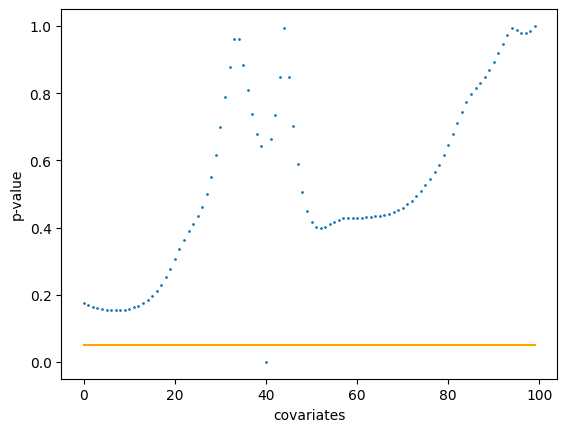

In [13]:
S = forwardVarSel(X_train_scaled, y_train_scaled)
fig = plt.figure()
print(S["X_k in order"])
plt.scatter(S["X_k in order"], S["p-value"], s = 1)
plt.plot(0.05*np.ones(len(S["p-value"])), 'orange')
plt.xlabel("covariates")
plt.ylabel("p-value")

Looking at the plot we have only one covariate that verifies a p-value smaller than 0.05. Let us now make our OLS on the selected covariates (here covariate 40).

In [14]:
Xtilde_train_scaled = []
Xtilde_test_scaled = []
A = list(S["X_k in order"])
for pval, k in zip(S["p-value"],S["X_k in order"]): 
    if pval > 0.05:
        A.remove(k)
print(A)

for k in A:
    Xtilde_train_scaled.append(X_train_scaled[:,k])
    Xtilde_test_scaled.append(X_test_scaled[:,k])

Xtilde_train_scaled = np.array(Xtilde_train_scaled).T
Xtilde_test_scaled = np.array(Xtilde_test_scaled).T

print(Xtilde_train_scaled.shape)

OLS_selected = LinearRegression(fit_intercept=False).fit(Xtilde_train_scaled, y_train_scaled)

if len(df_coef) < 2:
    df_coef = pd.concat([df_coef, pd.DataFrame({"coef" : ["selected OLS"], "R2": [OLS_selected.score(Xtilde_test_scaled, y_test_scaled)]})], ignore_index = True)
df_coef

[40]
(161, 1)


,coef,R2
0,sklearn OLS,0.960055
1,selected OLS,0.127139


Let's do the same using the SequentialFeatureSelector of sklearn.

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector
reg = LinearRegression(fit_intercept=False)
sfs = SequentialFeatureSelector(reg,  n_features_to_select=len([i for i in S["p-value"] if i <=0.05]))
sfs.fit(X_train_scaled, y_train_scaled)
X_r_train = sfs.transform(X_train_scaled)
X_r_test = sfs.transform(X_test_scaled)

In [16]:
reg.fit(X_r_train, y_train_scaled)
if len(df_coef) < 3:
    df_coef = pd.concat([df_coef, pd.DataFrame({"coef" : ["selected-OLS-w-sklearn"], "R2": [reg.score(X_r_test, y_test_scaled)]})], ignore_index = True)
df_coef

,coef,R2
0,sklearn OLS,0.960055
1,selected OLS,0.127139
2,selected-OLS-w-sklearn,0.127139


In [17]:
np.where(sfs.get_support() == True)[0]

array([40])

We seem to have the same selected covariate as the one selected by our algorithm. But in the case where we select more than 1, we see that it does not correspond to the same covariates as the ones we would have selected:

In [18]:
sfs = SequentialFeatureSelector(reg,  n_features_to_select=4)
sfs.fit(X_train_scaled, y_train_scaled)
print("Sklearn selected covariates : " + str(np.where(sfs.get_support() == True)[0]))
print("Our selected covariates : " + str(S["X_k in order"][:4]))


Sklearn selected covariates : [19 21 40 46]
Our selected covariates : [40, 7, 6, 8]


We might ask ourselves why this difference ? And after looking at how the SequentialFeatureSelector works, we can see that the difference comes from the way the covariates are selected. In our method (Forward Selection) we use statistical test of no effect so we work with p-values, whereas the SequentialFeatureSelector works with the score ($R^2$) of the estimators.

# RIDGE

The solution of the problem : $\displaystyle\min_\theta \|Y - X\theta\| + n\lambda\|\theta\|$ is called the ridge estimator. It is unique and is obtained by : $\displaystyle\hat{\theta}^{(rdg)}_n = (X^TX + n\lambda I_p)^{-1}X^TY$.

In [19]:
def ridge_estimator(X,y, alpha):
    n = np.shape(X)[0]
    p = np.shape(X)[1]
    return np.matmul(np.linalg.inv(np.matmul(X.T,X) + n*alpha*np.eye(p)), np.matmul(X.T,y))

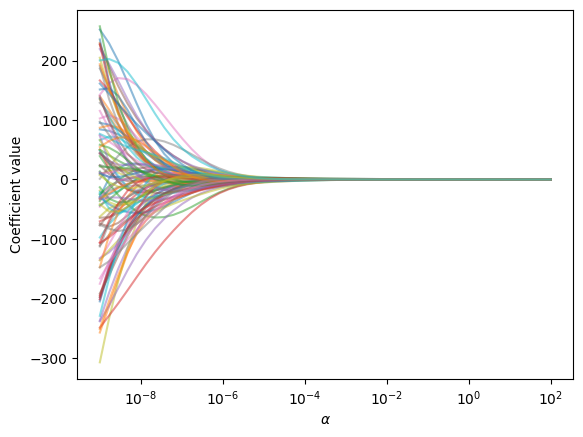

In [20]:
A = np.logspace(-9,2)
Ridge = []
for a in A:
    Ridge.append(ridge_estimator(X_train_scaled,y_train_scaled, a).T[0])
Ridge = np.array(Ridge)
fig = plt.figure()
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Coefficient value')
for i in range(Ridge.shape[1]):
    plt.plot(A, Ridge[:,i], alpha= 0.5)

In [21]:
def MSE(estimator, y):
    n = len(y)
    return np.sum((estimator - y)**2)/n

In [22]:
import sklearn.metrics

In [23]:
def get_R2(estimator, X, y_test): #this will be usefull
    y = np.matmul(X, estimator)
    return sklearn.metrics.r2_score(y_test, y)

In [24]:
def optimise_MSE(estimator_array, X_train, X_test, y_train, y_test, A):
    errors_train = []
    errors_test = []
    alpha_optim = None  #will we store this for building our final ridge estimator
    min_MSE = 1e10
    for (est,alpha) in zip(estimator_array,A):
        est = est.reshape(-1,1)
        Yhat_train = np.matmul(X_train, est)
        Yhat_test = np.matmul(X_test, est)
        errors_train.append(MSE(Yhat_train, y_train))
        errors_test.append(MSE(Yhat_test, y_test))
        MSE_ = MSE(Yhat_test, y_test)
        if(MSE_ < min_MSE):
            print("got a better alpha : {}".format(alpha))
            min_MSE = MSE_
            alpha_optim = alpha

    ax = plt.gca()
    ax.set_xscale('log')
    plt.scatter(A, errors_train, color='red', s=50, marker='1', alpha = 0.5)
    plt.scatter(A, errors_test, color='green', s=50, marker='2')
    plt.scatter(A[np.argmin(errors_test)], np.min(errors_test), color='purple', s=10, marker='o')
    plt.scatter(A[np.argmin(errors_train)], np.min(errors_train), color='red', s=10, marker='o')

    plt.legend(["MSE on train set", "MSE on test set", "min value for test set", "min value for train set"])
    plt.xlabel('alpha values')
    plt.ylabel('MSE')
    
    return alpha_optim



got a better alpha : 1e-09


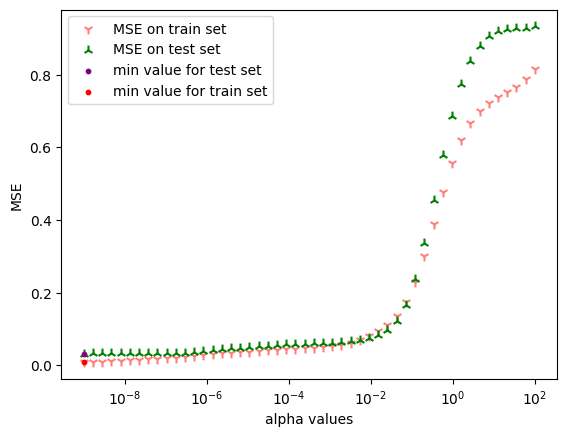

In [25]:
A_ridge = np.logspace(-9,2)
ridge_alpha_optim = optimise_MSE(Ridge, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, A_ridge)

It seems that the best value of $\alpha$ (that minimises the training error) is $\alpha \approx 0$, this means that an OLS is best in this problem. That said (and after testing for smaller values of $\alpha$), the $R^2$ value is not best in OLS even though the MSE is lower. 

In [26]:
r_optimal = ridge_estimator(X_train_scaled, y_train_scaled, ridge_alpha_optim)
R2 = get_R2(r_optimal, X_test_scaled, y_test_scaled)

if len(df_coef) < 4:
    df_coef = pd.concat([df_coef, pd.DataFrame({"coef" : ["ridge"], "R2": [R2]})], ignore_index = True)
df_coef

,coef,R2
0,sklearn OLS,0.960055
1,selected OLS,0.127139
2,selected-OLS-w-sklearn,0.127139
3,ridge,0.968269


# LASSO

We will use sklearn's version of Lasso. To build it we must input $\alpha$ values, for small values of $\alpha$ the Lasso method will need more iterations to converge to a solution. Since we are working with small values of $\alpha$ we will need to add more iterations than the default value. 

In [27]:
from sklearn.linear_model import Lasso

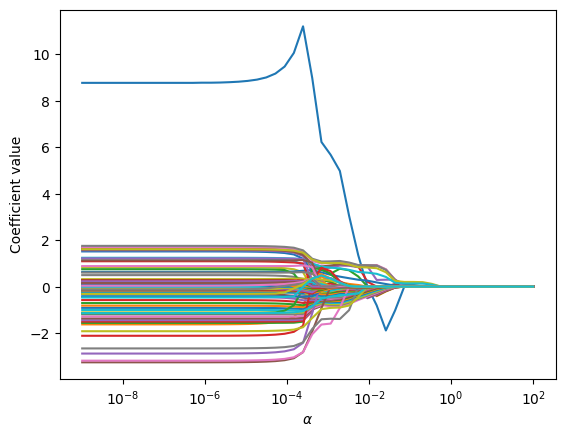

In [28]:
A_lasso = np.logspace(-5,-2)
Lassos = []
for a in A:
    las = Lasso(alpha=a, fit_intercept=False, max_iter=10**6, tol=0.05)
    Lassos.append(las.fit(X_train_scaled, y_train_scaled).coef_)

Lassos = np.array(Lassos)
fig = plt.figure()
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Coefficient value')
for i in range(Lassos.shape[1]):
    plt.plot(A, Lassos[:,i])

We see that the coefficients are zeroed quite fast ($\alpha$ values smaller than 1)

In [29]:
def count_zeros(estimator_array):
    n_zeros = np.count_nonzero(estimator_array==0, axis=1)
    ax = plt.gca()
    ax.set_xscale('log')
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Number of \"zeroed\" covariates ')
    plt.scatter(A, n_zeros, s= 10)
    return n_zeros


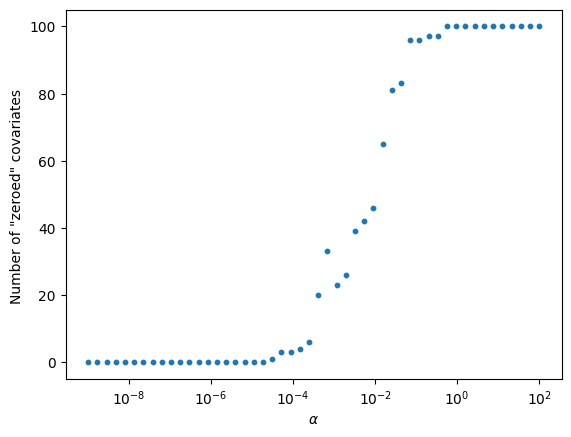

In [30]:
n_zeros=count_zeros(Lassos)

We see that the bigger the $\alpha$ the more covariates become zeros (in an exponential way for the log scale). We must find the right $\alpha$ that make the lasso select the right covariates without reducing the estimator to the nul vector. 

got a better alpha : 1e-05
got a better alpha : 1.1513953993264481e-05
got a better alpha : 1.3257113655901082e-05
got a better alpha : 1.5264179671752335e-05
got a better alpha : 1.757510624854793e-05
got a better alpha : 2.0235896477251556e-05
got a better alpha : 2.3299518105153718e-05
got a better alpha : 2.6826957952797274e-05
got a better alpha : 3.0888435964774785e-05
got a better alpha : 3.5564803062231284e-05
got a better alpha : 4.094915062380427e-05
got a better alpha : 4.71486636345739e-05
got a better alpha : 5.4286754393238594e-05
got a better alpha : 6.250551925273976e-05
got a better alpha : 7.196856730011514e-05
got a better alpha : 8.286427728546843e-05
got a better alpha : 9.540954763499944e-05
got a better alpha : 0.00010985411419875583
got a better alpha : 0.00012648552168552957
got a better alpha : 0.00014563484775012445
got a better alpha : 0.00016768329368110083
got a better alpha : 0.00019306977288832496
got a better alpha : 0.00022229964825261955
got a better 

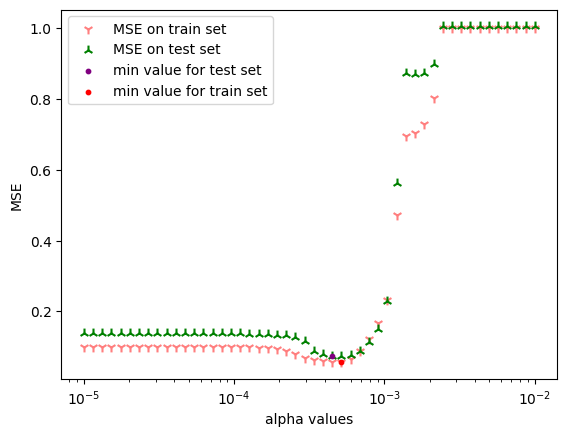

In [31]:
A_lasso = np.logspace(-5,-2)
lasso_alpha_optim = optimise_MSE(Lassos, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, A_lasso)

In [32]:
lasso_estimator = Lasso(alpha=lasso_alpha_optim, fit_intercept=False, max_iter=10**7, tol=0.001).fit(X_train_scaled, y_train_scaled)


if len(df_coef) < 5:
    df_coef = pd.concat([df_coef, pd.DataFrame({"coef" : ["Lasso"], "R2": [lasso_estimator.score(X_test_scaled, y_test_scaled)]})], ignore_index = True)
df_coef


,coef,R2
0,sklearn OLS,0.960055
1,selected OLS,0.127139
2,selected-OLS-w-sklearn,0.127139
3,ridge,0.968269
4,Lasso,0.937211


# Cross validation

In [33]:
from sklearn.linear_model import ElasticNet

In [34]:
def build_folds(k, X, y):
    folds = []
    n = X.shape[0]
    num_in_test =  n // k
    r = n % k
    for i in range(k):
        eX = X.copy()
        ey = y.copy()
        
        

        interval = range(int(num_in_test*i),int(num_in_test*(i+1))) 
        X_test_k = X[num_in_test*i:num_in_test*(i+1), :]
        y_test_k = y[num_in_test*i:num_in_test*(i+1), :]
        X_train_k = np.array([eX[i, :] for i in range(n) if i not in interval])
        y_train_k = np.array([ey[i, :] for i in range(n) if i not in interval])
        
        folds.append((X_train_k, X_test_k, y_train_k, y_test_k))
    return folds
    

This function allows us to build the folds used in the cross_validation method. A fold is a combination of train and test sets, and by setting k we build k folds so k combinations of train/test sets. In this case the folds all have exactly the same size, but in some case we do not use all of the data.

In [35]:
def cross_validation(k, X, y,  estimator):
    MSE_ = []
    folds = build_folds(k, X, y)
    for i in range(k):
        X_train, X_test, y_train, y_test = folds[i]
        est = np.array(estimator.fit(X_train, y_train).coef_).reshape(-1,1)
        Yhat = np.matmul(X_test, est) 
        MSE_.append(MSE(Yhat, y_test))
    mean = np.sum(MSE_)/k
    return mean
        
        
        

The cross validation method allows us to compare different methods of solving the initial problem (ie compare Lasso, ridge and OLS or in this case find the best parameters). This works by obtaining an average of the MSE's of each method over a certain number of folds. This will then help us decide which parameters work best in our model.

In [36]:
A_ridge = np.logspace(-10, 3, num = 20)
A_lasso = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
Means = []
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)
number_folds = 5

for a_ridge in A_ridge:
    for a_lasso in A_lasso:
        alpha = a_ridge + a_lasso
        l1_ratio = a_lasso / alpha
        estimator = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, fit_intercept=False, max_iter=10**6, tol=0.5)
        Means.append((a_ridge,a_lasso, cross_validation(number_folds, X_scaled, y_scaled, estimator)))


In [37]:
print("According to our cross validation, the best combination of (alpha_ridge,alpha_lasso) is : " + str((Means[np.argmin([i[2] for i in Means])][0],Means[np.argmin([i[2] for i in Means])][1])))

According to our cross validation, the best combination of (alpha_ridge,alpha_lasso) is : (1.8329807108324374, 0)


# Bootstrap

Text(0, 0.5, 'fat')

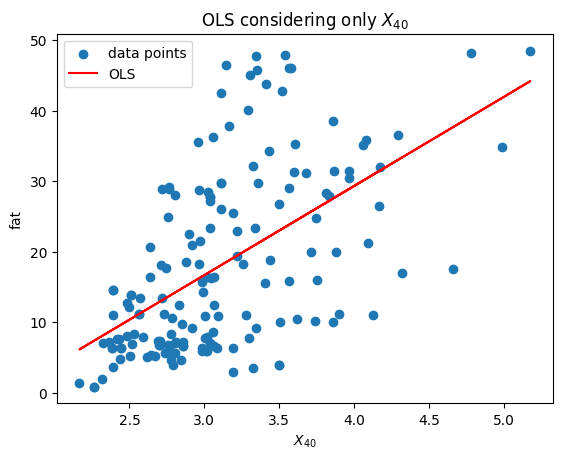

In [57]:
X_40 = X[:, 40].reshape(-1, 1)
X_40_train, X_40_test, y_train, y_test = train_test_split(X_40, y, test_size=0.25, random_state=0)
OLS = LinearRegression().fit(X_40_train, y_train)
Yhat = OLS.predict(X_40_train)
plt.figure()
plt.scatter(X_40_train, y_train)
plt.plot(X_40_train, Yhat, c="red")
plt.title("OLS considering only $X_{40}$")
plt.legend(["data points", "OLS"])
plt.xlabel("$X_{40}$")
plt.ylabel("fat")

In [39]:
num_of_samples = 50
size_of_sample = X_40_train.shape[0]
B_Samples = []
for s in range(num_of_samples):
    Sample_X = []
    Sample_y = []
    for k in range(size_of_sample):
        i = random.randint(0, size_of_sample - 1)
        Sample_X.append(X_40_train[i])
        Sample_y.append(y_train[i])
    B_Samples.append((Sample_X, Sample_y))

Text(0, 0.5, 'fat')

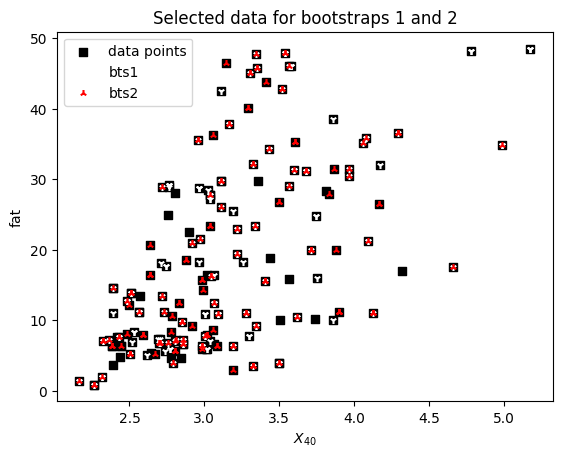

In [59]:
plt.figure()
plt.scatter(X_40_train, y_train, c="black", marker="s")
plt.scatter(B_Samples[0][0], B_Samples[0][1], c="white", s = 25, alpha=1, marker="1")
plt.scatter(B_Samples[1][0], B_Samples[1][1], c="red", s = 25, alpha=1, marker="2")

plt.legend(["data points", "bts1", "bts2"])
plt.title("Selected data for bootstraps 1 and 2")
plt.xlabel("$X_{40}$")
plt.ylabel("fat")

We see that we select certain data points for a bootstrap and even sometimes several times the same data point in one sample. 

In [41]:
from scipy.stats import t

alpha = 0.005

def CI(x, OLS):
    Yhat = OLS.predict(X_40_train)
    t_a = t.ppf(1 - alpha/2, n - (p + 1)) #confidence at level (1 - alpha/2)
    sigma2 = sum((y_train - Yhat)**2)/n
    Gram_inv = 1 / np.matmul(X_40_train.T, X_40_train)
    return (Yhat - t_a * (1 + sigma2*Gram_inv*np.matmul(x.T, x))**0.5,Yhat + t_a * (1 + sigma2*Gram_inv*np.matmul(x.T, x))**0.5)

Text(0.5, 1.0, 'All the 50 regression lines depending on each Bootstrap sample, with the predicition intervals.')

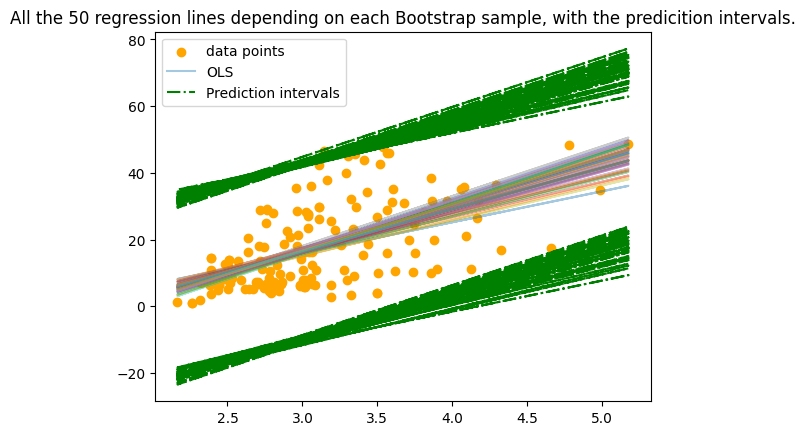

In [42]:
plt.figure()
plt.scatter(X_40_train, y_train, c="orange")


for sample in B_Samples:
    sample_x = sample[0]
    sample_y = sample[1]
    OLS = LinearRegression().fit(sample_x, sample_y)
    Yhat = OLS.predict(X_40_train)
    CI_low, CI_up = CI(X_40_train, OLS)
    plt.plot(X_40_train, Yhat, alpha=0.4)
    plt.plot(X_40_train, CI_low, linestyle = "dashdot", c = "green")
    plt.plot(X_40_train, CI_up, linestyle = "dashdot", c = "green")
    
plt.legend(["data points", "OLS", "Prediction intervals"])
plt.title("All the 50 regression lines depending on each Bootstrap sample, with the predicition intervals.")


# PCA

We are going to do PCA before OLS. It is important to have scaled data for this (to find the right principal components) that is why we go back to the scaled data.


Let's first calculate the empirical covariance matrix using the formula : $\hat{\Sigma}_n = n^{-1} \displaystyle \sum_{i=1}^n \left(x_i - \bar{x}_n\right)\left(x_i - \bar{x}_n\right)^{T} = <X , X> = X^TX$ (because the data is centered).

In [43]:
covariance = X_train_scaled.T@X_train_scaled
covariance_scaled = scaler.fit_transform(covariance)
U,s,V = np.linalg.svd(covariance_scaled)


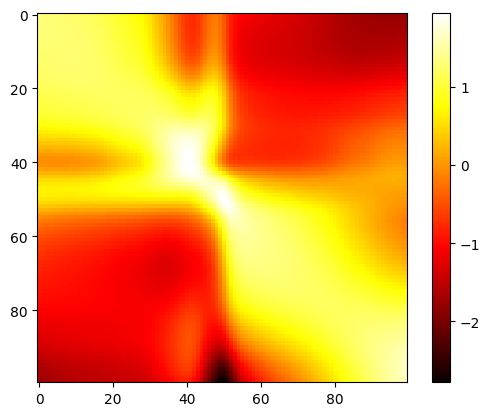

In [44]:
plt.imshow(covariance_scaled, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

This heatmap shows us that different covariates are very weakly correlated, with high variance.

We remind ourselves that the covariance matrix is symmetric and so it can be diagonalized and the SVD coincides with the eigen-diagonalisation : $cov(X) = UDU^T$, We do want to order the eigenvectors in the same order as the eigenvalues in terms of magnitude but that is already done by the svd method of numpy (check next snippet). 
We have the SVD of the covariance matrix so we just have to calculate $XU$ to have projection of $X$ on the Principle Component space. 

In [45]:
print(np.abs(s))

[8.67090398e+01 3.85795988e+01 3.07117774e+01 7.02883265e+00
 6.57603091e-01 3.11260311e-01 9.13860521e-02 3.74072597e-02
 1.09305937e-02 3.82293608e-03 1.34536063e-03 7.70465122e-04
 3.56332285e-04 2.75925482e-04 1.14721547e-04 9.44088407e-05
 6.46474526e-05 4.72548017e-05 3.57244666e-05 2.44510770e-05
 1.90368686e-05 1.42938439e-05 8.95682641e-06 6.32396212e-06
 5.88557267e-06 5.11244845e-06 4.23506959e-06 3.68652088e-06
 3.35354768e-06 2.57495630e-06 2.42762743e-06 1.89251800e-06
 1.80441398e-06 1.60849272e-06 1.36607452e-06 1.14060651e-06
 9.95413254e-07 9.73077191e-07 9.13805188e-07 6.24481634e-07
 5.74044820e-07 5.41437037e-07 5.04209814e-07 4.47622424e-07
 3.43307915e-07 3.30247779e-07 3.01532496e-07 2.60820493e-07
 2.51667766e-07 2.26497495e-07 2.02930235e-07 1.75156961e-07
 1.56375933e-07 1.27627818e-07 1.17532113e-07 1.15068757e-07
 1.09696145e-07 1.07240207e-07 9.14303078e-08 8.66125232e-08
 7.41714436e-08 7.37695522e-08 7.22399439e-08 6.05155192e-08
 5.41734708e-08 5.138690

So now let's procede in calculating the Principal Components as a matrix of column vectors (exactly the eigenvectors in this case). Then project our data on the basis $\mathcal{B} = \left(PC_1, PC_2\right)$ by calculating $XU$. We sometimes use the correlation matrix (or the scaled covariance matrix) to have less impact from the high variance covariates, but in our case since we have scaled all the data and since the variance (as we can see next in the covariance matrix) are quite close, we do not need to use the correlation matrix.

In [46]:
covariance = X_train_scaled.T@X_train_scaled
print(covariance)

U,s,V = np.linalg.svd(covariance)
    
proj_X = X_train_scaled@U

[[161.         160.99863091 160.99474787 ... 155.67252106 155.63092714
  155.59939261]
 [160.99863091 161.         160.99874084 ... 155.70966145 155.6700692
  155.6406231 ]
 [160.99474787 160.99874084 161.         ... 155.74378051 155.70609352
  155.67862606]
 ...
 [155.67252106 155.70966145 155.74378051 ... 161.         160.99824015
  160.99280551]
 [155.63092714 155.6700692  155.70609352 ... 160.99824015 161.
  160.99813895]
 [155.59939261 155.6406231  155.67862606 ... 160.99280551 160.99813895
  161.        ]]


We want the amount of variance explained by the first k components because find that will help us understand where the variance of the set comes from, meaning that the higher the variance explained, the higher the impact of the Principal Component.

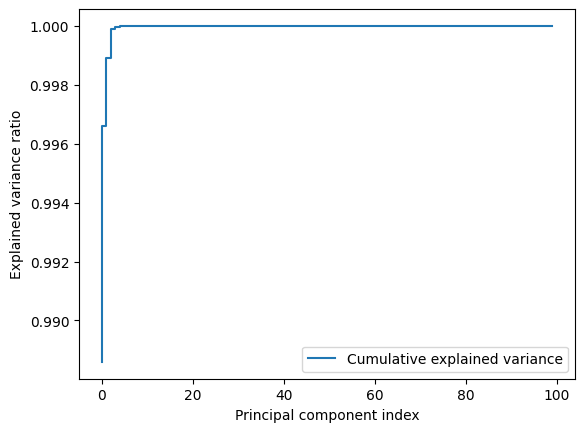

In [47]:
Var = []
for k in range(p):
    Var.append(np.sum(s[:k+1] / np.sum(s)))
plt.step(range(0,len(Var)), Var, label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

we see that PC1 and PC2 (and a little bit PC3) have a high impact on the explained variance the rest is nearly negligible. This means that the whole problem seems to reside greatly on the 3 Principal Components.

Text(0, 0.5, 'PC2')

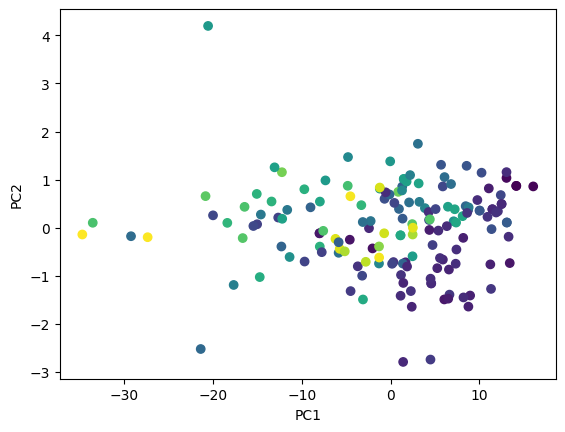

In [48]:
plt.scatter(proj_X[:,0], proj_X[:,1], c=y_train_scaled)
plt.xlabel("PC1")
plt.ylabel("PC2")

It seems that PC1 and PC2 are weakly correlated. This is coherent with the heatmap in some sens.

In [49]:
proj_X_train = X_train_scaled@U
proj_X_test = X_test_scaled@U
scores = []
for k in range(2, len(y_train_scaled)):
    reg = LinearRegression(fit_intercept=False).fit(proj_X_train[:, :k], y_train_scaled)
    scores.append(reg.score(proj_X_test[:, :k], y_test_scaled))
print("The best score of {} is obtained when taking {} Principle Components over {} of them.".format(np.max(scores), np.argmax(scores), 100))

The best score of 0.9774595723333614 is obtained when taking 82 Principle Components over 100 of them.


In [50]:
if len(df_coef) < 6:
    df_coef = pd.concat([df_coef, pd.DataFrame({"coef" : ["PCA before OLS"], "R2": [np.max(scores)]})], ignore_index = True)
df_coef

,coef,R2
0,sklearn OLS,0.960055
1,selected OLS,0.127139
2,selected-OLS-w-sklearn,0.127139
3,ridge,0.968269
4,Lasso,0.937211
5,PCA before OLS,0.977460


# Comparison of the models

We have constructed different models to find best model to estimate the parameters of the problem (ie finding the parameter that best estimates the solution to the linear problem : $y = X\theta^*$). 

We have seen 3 main different models : the OLS, the Ridge, and the Lasso. Each having their specific characteristics. 
The OLS estimates the solution by finding the best solution to a minimizing problem without constraint meaning that it is a good solution in some cases but it may over/underfit to the data in other cases. That is why we add a constraint (to be precise it is a penalty on the problem) in the Ridge or Lasso regression to avoid these problems.
We remind ourselves that we want to minimise the variance and bias couple to some extent.

A penalty that imposes either a small L1-norm (Ridge) or a small L2-norm (Lasso) to the parameter. The penalty on the Lasso help 0 out some coefficients of the estimator, the 0'ed coefficients are the less impacting ones. On the ridge we penalise high values of $\theta$. 

To help out the OLS in having better performence (and to be a good alternative to Lasso and Ridge) we have tried out 2 methods : forward variable selection, and PCA before OLS.

Forward variable selection uses hypothesis testing to find the most impacting covariates and to isolate them. We then in practice should have a more precise solution. In the TP having selecting only 1 covariate makes it's performance seem weak, but if we had chosen more (with a lighter constraint on the p-values) we would have had better results. 

PCA is a way of reducing the data's dimensions, and finding the best directions to treat the data. By considering the SVD of the covariance matrix of the data, we can project the data onto a space induced by the Principal Components of the data. This seems to be a more efficient way of doing variable selection. 

We have also looked at the Elastic-Net that allows us to apply Ridge and Lasso regression in some proportions to the problem. This in some cases gives the good sides of each model to the Elastic-Net model. 

We have implemented cross validation to find the best combination of 

Finally looking at our dataFrame, the best performing estimator for the data we have is the PCA before OLS model.
